# Набросок

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

#use seaborn plotting defaults
import seaborn as sns; sns.set()
from tqdm import tqdm
from sklearn.metrics import classification_report

## Считывание данных

In [59]:
#-Каскады-Хаара-
dirname = "./ML_track_train"

x, y = [], []

Crop = True
 
for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    y.append(int(fname.split('label')[1].split('.png')[0]))
    if Crop is True:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)

        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)

        x.append(img)
    except:
        print(f'no face found for {fname}')
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)

        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        x.append(img)
len(x), len(y)

  4%|█▌                                        | 12/313 [00:00<00:08, 34.46it/s]

no face found for image209_label6.png


 10%|████▎                                     | 32/313 [00:00<00:07, 37.57it/s]

no face found for image15_label0.png
no face found for image251_label6.png


 21%|████████▋                                 | 65/313 [00:01<00:06, 37.98it/s]

no face found for image280_label6.png


 23%|█████████▊                                | 73/313 [00:01<00:06, 35.65it/s]

no face found for image9_label7.png


 26%|██████████▊                               | 81/313 [00:02<00:06, 34.25it/s]

no face found for image4_label5.png


 32%|█████████████▏                           | 101/313 [00:02<00:05, 36.63it/s]

no face found for image287_label6.png
no face found for image311_label9.png


 38%|███████████████▍                         | 118/313 [00:03<00:05, 37.07it/s]

no face found for image56_label7.png
no face found for image206_label6.png


 42%|█████████████████▎                       | 132/313 [00:03<00:04, 37.37it/s]

no face found for image189_label6.png


 48%|███████████████████▌                     | 149/313 [00:04<00:04, 36.45it/s]

no face found for image282_label5.png


 54%|██████████████████████▎                  | 170/313 [00:04<00:03, 37.66it/s]

no face found for image295_label0.png


 58%|███████████████████████▊                 | 182/313 [00:04<00:03, 35.35it/s]

no face found for image234_label9.png
no face found for image49_label0.png


 67%|███████████████████████████▌             | 210/313 [00:05<00:02, 37.31it/s]

no face found for image156_label6.png
no face found for image90_label6.png
no face found for image98_label0.png


 80%|████████████████████████████████▋        | 250/313 [00:06<00:01, 35.82it/s]

no face found for image140_label6.png


 90%|████████████████████████████████████▉    | 282/313 [00:07<00:00, 35.92it/s]

no face found for image38_label6.png


 94%|██████████████████████████████████████▌  | 294/313 [00:08<00:00, 34.96it/s]

no face found for image216_label7.png


100%|█████████████████████████████████████████| 313/313 [00:08<00:00, 36.61it/s]


(313, 313)

In [60]:
def sort_by_index(fname):
    return int(fname.split('.')[0].split('image')[1])

In [61]:
#-Загрузка-тестового-датасета-с-применением-каскадов-Хаара-
dirname = "./ML_track_test"

Xtest = []
Names = []

Crop = True
for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    Names.append(fname) 
    
    if Crop is True:
        img = cv2.resize(img, (256, 256), interpolation = cv2.INTER_AREA)
        
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
        face = face_cascade.detectMultiScale(img)
        for (a, b, w, h) in face:
            cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
            face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)

        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)

        Xtest.append(img)
    except:
        print(f'no face found for {fname}')
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)

        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        Xtest.append(img)
len(Xtest)

  1%|▎                                        | 16/2090 [00:00<00:54, 37.91it/s]

no face found for image8.png


  1%|▌                                        | 28/2090 [00:00<00:55, 37.49it/s]

no face found for image20.png


  2%|▋                                        | 36/2090 [00:00<00:56, 36.35it/s]

no face found for image31.png
no face found for image32.png


  3%|█                                        | 56/2090 [00:01<00:57, 35.36it/s]

no face found for image51.png
no face found for image55.png
no face found for image58.png


  3%|█▍                                       | 72/2090 [00:01<00:55, 36.54it/s]

no face found for image65.png


  4%|█▋                                       | 84/2090 [00:02<00:56, 35.47it/s]

no face found for image78.png


  4%|█▊                                       | 92/2090 [00:02<00:54, 36.75it/s]

no face found for image87.png


  5%|█▉                                      | 100/2090 [00:02<00:54, 36.75it/s]

no face found for image95.png


  5%|██▏                                     | 112/2090 [00:03<00:56, 35.13it/s]

no face found for image105.png
no face found for image111.png


  6%|██▎                                     | 120/2090 [00:03<00:55, 35.55it/s]

no face found for image113.png
no face found for image114.png


  7%|██▉                                     | 152/2090 [00:04<00:56, 34.43it/s]

no face found for image146.png


  8%|███▎                                    | 172/2090 [00:04<00:56, 33.87it/s]

no face found for image167.png


  9%|███▊                                    | 196/2090 [00:05<00:52, 35.98it/s]

no face found for image191.png
no face found for image194.png
no face found for image197.png


 11%|████▎                                   | 224/2090 [00:06<00:49, 37.57it/s]

no face found for image217.png
no face found for image218.png


 11%|████▌                                   | 236/2090 [00:06<00:49, 37.83it/s]

no face found for image230.png
no face found for image231.png


 12%|████▋                                   | 244/2090 [00:06<00:50, 36.28it/s]

no face found for image238.png
no face found for image243.png


 12%|████▉                                   | 260/2090 [00:07<00:49, 37.15it/s]

no face found for image252.png


 13%|█████▏                                  | 268/2090 [00:07<00:49, 36.93it/s]

no face found for image263.png


 14%|█████▍                                  | 284/2090 [00:07<00:48, 37.53it/s]

no face found for image278.png
no face found for image280.png


 14%|█████▋                                  | 296/2090 [00:08<00:47, 37.53it/s]

no face found for image291.png


 15%|█████▉                                  | 312/2090 [00:08<00:47, 37.32it/s]

no face found for image306.png


 16%|██████▏                                 | 324/2090 [00:08<00:47, 37.06it/s]

no face found for image316.png


 17%|██████▌                                 | 345/2090 [00:09<00:46, 37.36it/s]

no face found for image339.png
no face found for image345.png


 18%|███████                                 | 371/2090 [00:10<00:44, 38.48it/s]

no face found for image363.png
no face found for image368.png


 18%|███████▎                                | 383/2090 [00:10<00:45, 37.45it/s]

no face found for image378.png
no face found for image380.png
no face found for image382.png


 19%|███████▌                                | 395/2090 [00:10<00:45, 37.56it/s]

no face found for image389.png
no face found for image395.png
no face found for image396.png


 20%|████████▏                               | 427/2090 [00:11<00:44, 37.08it/s]

no face found for image419.png


 21%|████████▌                               | 449/2090 [00:12<00:45, 36.24it/s]

no face found for image443.png


 22%|████████▊                               | 462/2090 [00:12<00:42, 38.25it/s]

no face found for image454.png


 23%|█████████                               | 471/2090 [00:12<00:43, 37.43it/s]

no face found for image466.png


 24%|█████████▊                              | 510/2090 [00:13<00:40, 39.42it/s]

no face found for image505.png


 25%|██████████                              | 527/2090 [00:14<00:39, 39.34it/s]

no face found for image520.png


 26%|██████████▍                             | 544/2090 [00:14<00:41, 37.45it/s]

no face found for image539.png


 27%|██████████▋                             | 556/2090 [00:15<00:42, 36.21it/s]

no face found for image549.png
no face found for image551.png
no face found for image555.png


 27%|██████████▉                             | 573/2090 [00:15<00:39, 38.55it/s]

no face found for image565.png
no face found for image566.png
no face found for image567.png
no face found for image570.png


 28%|███████████▏                            | 585/2090 [00:15<00:39, 37.88it/s]

no face found for image577.png
no face found for image582.png


 28%|███████████▎                            | 593/2090 [00:16<00:39, 37.60it/s]

no face found for image588.png


 29%|███████████▍                            | 598/2090 [00:16<00:38, 38.69it/s]/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

 29%|███████████▋                            | 610/2090 [00:16<00:40, 36.77it/s]/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

no face found for image615.png


 30%|████████████                            | 631/2090 [00:17<00:37, 38.41it/s]

no face found for image627.png
no face found for image634.png


 31%|████████████▍                           | 648/2090 [00:17<00:37, 38.94it/s]

no face found for image643.png


 32%|████████████▋                           | 660/2090 [00:17<00:38, 36.98it/s]

no face found for image652.png


 32%|████████████▊                           | 672/2090 [00:18<00:38, 37.04it/s]

no face found for image667.png


/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

no face found for image675.png
no face found for image680.png


 33%|█████████████                           | 684/2090 [00:18<00:38, 36.58it/s]/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

no face found for image689.png


 34%|█████████████▊                          | 721/2090 [00:19<00:36, 37.59it/s]

no face found for image715.png


 36%|██████████████▏                         | 742/2090 [00:20<00:35, 37.47it/s]

no face found for image735.png


 36%|██████████████▎                         | 751/2090 [00:20<00:34, 39.07it/s]

no face found for image746.png


 37%|██████████████▋                         | 767/2090 [00:20<00:35, 36.81it/s]

no face found for image759.png
no face found for image762.png


 38%|███████████████▏                        | 794/2090 [00:21<00:32, 40.50it/s]

no face found for image787.png


 39%|███████████████▌                        | 811/2090 [00:21<00:32, 38.96it/s]

no face found for image803.png
no face found for image808.png
no face found for image810.png


 39%|███████████████▋                        | 819/2090 [00:22<00:33, 38.50it/s]

no face found for image811.png


 41%|████████████████▎                       | 850/2090 [00:22<00:31, 39.38it/s]

no face found for image844.png


 41%|████████████████▍                       | 862/2090 [00:23<00:32, 37.33it/s]

no face found for image856.png
no face found for image859.png
no face found for image861.png


 42%|████████████████▊                       | 878/2090 [00:23<00:33, 35.98it/s]

no face found for image872.png
no face found for image873.png


 43%|█████████████████▏                      | 895/2090 [00:24<00:33, 36.20it/s]

no face found for image888.png


 43%|█████████████████▎                      | 907/2090 [00:24<00:33, 35.05it/s]

no face found for image901.png


 44%|█████████████████▌                      | 915/2090 [00:24<00:33, 34.90it/s]

no face found for image909.png


 44%|█████████████████▋                      | 927/2090 [00:25<00:31, 36.62it/s]

no face found for image921.png
no face found for image922.png


 45%|██████████████████                      | 943/2090 [00:25<00:31, 36.10it/s]

no face found for image936.png
no face found for image937.png


 46%|██████████████████▎                     | 960/2090 [00:25<00:30, 37.03it/s]

no face found for image954.png


 46%|██████████████████▌                     | 968/2090 [00:26<00:29, 37.73it/s]

no face found for image962.png


 47%|██████████████████▊                     | 980/2090 [00:26<00:29, 38.01it/s]

no face found for image975.png
no face found for image979.png


 47%|██████████████████▉                     | 988/2090 [00:26<00:31, 35.17it/s]

no face found for image984.png


 48%|██████████████████▋                    | 1000/2090 [00:27<00:29, 37.01it/s]

no face found for image996.png
no face found for image998.png
no face found for image1001.png


 48%|██████████████████▉                    | 1013/2090 [00:27<00:29, 37.04it/s]

no face found for image1009.png
no face found for image1016.png


 49%|███████████████████▏                   | 1026/2090 [00:27<00:28, 36.70it/s]

no face found for image1018.png
no face found for image1023.png
no face found for image1025.png


 49%|███████████████████▎                   | 1034/2090 [00:27<00:28, 37.51it/s]

no face found for image1029.png


 50%|███████████████████▌                   | 1048/2090 [00:28<00:26, 38.78it/s]

no face found for image1040.png


 51%|███████████████████▊                   | 1065/2090 [00:28<00:26, 39.13it/s]

no face found for image1058.png
no face found for image1065.png


 52%|████████████████████▎                  | 1090/2090 [00:29<00:25, 38.47it/s]

no face found for image1083.png


 53%|████████████████████▊                  | 1116/2090 [00:30<00:26, 37.32it/s]

no face found for image1111.png
no face found for image1112.png


 55%|█████████████████████▍                 | 1146/2090 [00:30<00:25, 37.70it/s]

no face found for image1139.png
no face found for image1140.png
no face found for image1142.png


 55%|█████████████████████▌                 | 1155/2090 [00:31<00:24, 38.07it/s]

no face found for image1149.png
no face found for image1151.png
no face found for image1157.png


 56%|█████████████████████▊                 | 1172/2090 [00:31<00:25, 36.31it/s]

no face found for image1167.png
no face found for image1168.png


 58%|██████████████████████▋                | 1215/2090 [00:32<00:22, 38.34it/s]

no face found for image1209.png
no face found for image1211.png
no face found for image1212.png
no face found for image1214.png


 59%|███████████████████████                | 1235/2090 [00:33<00:22, 37.99it/s]

no face found for image1227.png
no face found for image1229.png


 60%|███████████████████████▏               | 1244/2090 [00:33<00:21, 38.56it/s]

no face found for image1239.png


 60%|███████████████████████▌               | 1264/2090 [00:33<00:21, 38.55it/s]

no face found for image1258.png


 61%|███████████████████████▋               | 1272/2090 [00:34<00:21, 38.44it/s]

no face found for image1267.png


 61%|███████████████████████▉               | 1285/2090 [00:34<00:20, 38.67it/s]

no face found for image1277.png


 62%|████████████████████████▏              | 1294/2090 [00:34<00:20, 38.96it/s]

no face found for image1287.png
no face found for image1288.png


 63%|████████████████████████▌              | 1319/2090 [00:35<00:20, 37.27it/s]

no face found for image1311.png
no face found for image1318.png


 64%|████████████████████████▊              | 1331/2090 [00:35<00:20, 36.43it/s]

no face found for image1325.png


 64%|█████████████████████████              | 1343/2090 [00:36<00:20, 35.67it/s]

no face found for image1338.png


 65%|█████████████████████████▍             | 1364/2090 [00:36<00:19, 36.66it/s]

no face found for image1359.png
no face found for image1361.png


 66%|█████████████████████████▌             | 1373/2090 [00:36<00:18, 38.68it/s]

no face found for image1368.png
no face found for image1371.png


 68%|██████████████████████████▌            | 1426/2090 [00:38<00:16, 39.18it/s]

no face found for image1420.png
no face found for image1421.png


 69%|██████████████████████████▊            | 1439/2090 [00:38<00:16, 38.60it/s]

no face found for image1434.png
no face found for image1438.png


 71%|███████████████████████████▌           | 1474/2090 [00:39<00:15, 38.88it/s]

no face found for image1466.png
no face found for image1469.png
no face found for image1471.png


 72%|███████████████████████████▉           | 1495/2090 [00:40<00:15, 38.95it/s]

no face found for image1486.png
no face found for image1490.png


 72%|████████████████████████████▏          | 1511/2090 [00:40<00:15, 37.42it/s]

no face found for image1504.png


 73%|████████████████████████████▍          | 1523/2090 [00:40<00:14, 38.30it/s]

no face found for image1515.png
no face found for image1522.png


 74%|████████████████████████████▋          | 1539/2090 [00:41<00:14, 37.73it/s]

no face found for image1533.png


 74%|████████████████████████████▉          | 1553/2090 [00:41<00:13, 39.10it/s]

no face found for image1545.png
no face found for image1549.png


 75%|█████████████████████████████▏         | 1562/2090 [00:41<00:13, 39.19it/s]

no face found for image1555.png


 76%|█████████████████████████████▍         | 1579/2090 [00:42<00:13, 38.22it/s]

no face found for image1572.png
no face found for image1576.png


 76%|█████████████████████████████▊         | 1596/2090 [00:42<00:13, 37.80it/s]

no face found for image1589.png
no face found for image1596.png


 77%|█████████████████████████████▉         | 1604/2090 [00:42<00:13, 37.16it/s]

no face found for image1599.png
no face found for image1601.png
no face found for image1605.png


 77%|██████████████████████████████         | 1614/2090 [00:43<00:12, 38.45it/s]

no face found for image1609.png


 80%|███████████████████████████████        | 1666/2090 [00:44<00:11, 37.17it/s]

no face found for image1661.png


 81%|███████████████████████████████▌       | 1690/2090 [00:45<00:10, 37.16it/s]

no face found for image1683.png
no face found for image1689.png


 81%|███████████████████████████████▋       | 1699/2090 [00:45<00:10, 38.09it/s]

no face found for image1691.png
no face found for image1696.png


 82%|████████████████████████████████       | 1716/2090 [00:45<00:10, 37.39it/s]

no face found for image1708.png


 83%|████████████████████████████████▏      | 1728/2090 [00:46<00:09, 37.05it/s]

no face found for image1723.png
no face found for image1727.png


 83%|████████████████████████████████▍      | 1736/2090 [00:46<00:09, 36.95it/s]

no face found for image1731.png
no face found for image1734.png


 84%|████████████████████████████████▉      | 1765/2090 [00:47<00:08, 36.78it/s]

no face found for image1760.png
no face found for image1761.png


 85%|█████████████████████████████████▏     | 1777/2090 [00:47<00:08, 36.73it/s]

no face found for image1771.png
no face found for image1777.png


 86%|█████████████████████████████████▍     | 1795/2090 [00:48<00:07, 37.91it/s]

no face found for image1789.png


 87%|█████████████████████████████████▊     | 1811/2090 [00:48<00:07, 37.59it/s]

no face found for image1803.png


 87%|██████████████████████████████████     | 1824/2090 [00:48<00:07, 37.73it/s]

no face found for image1817.png


 88%|██████████████████████████████████▏    | 1833/2090 [00:49<00:06, 39.14it/s]

no face found for image1826.png


 88%|██████████████████████████████████▎    | 1841/2090 [00:49<00:06, 37.72it/s]

no face found for image1836.png
no face found for image1842.png


 89%|██████████████████████████████████▌    | 1853/2090 [00:49<00:06, 37.18it/s]

no face found for image1847.png
no face found for image1848.png
no face found for image1851.png


 90%|██████████████████████████████████▉    | 1874/2090 [00:50<00:05, 37.82it/s]

no face found for image1867.png
no face found for image1870.png
no face found for image1874.png


 90%|███████████████████████████████████▏   | 1886/2090 [00:50<00:05, 36.62it/s]

no face found for image1879.png


 91%|███████████████████████████████████▍   | 1899/2090 [00:50<00:04, 39.08it/s]

no face found for image1890.png
no face found for image1897.png


 91%|███████████████████████████████████▌   | 1907/2090 [00:51<00:04, 38.28it/s]

no face found for image1900.png
no face found for image1903.png


 92%|███████████████████████████████████▉   | 1925/2090 [00:51<00:04, 37.96it/s]

no face found for image1919.png
no face found for image1920.png
no face found for image1923.png


 93%|████████████████████████████████████▏  | 1939/2090 [00:51<00:03, 38.53it/s]

no face found for image1932.png


 93%|████████████████████████████████████▍  | 1952/2090 [00:52<00:03, 38.42it/s]

no face found for image1945.png


 94%|████████████████████████████████████▋  | 1964/2090 [00:52<00:03, 36.80it/s]

no face found for image1958.png


 94%|████████████████████████████████████▊  | 1972/2090 [00:52<00:03, 37.46it/s]

no face found for image1966.png
no face found for image1972.png


 95%|█████████████████████████████████████  | 1984/2090 [00:53<00:02, 37.94it/s]

no face found for image1977.png
no face found for image1979.png
no face found for image1980.png


 96%|█████████████████████████████████████▎ | 1997/2090 [00:53<00:02, 38.00it/s]

no face found for image1989.png


 96%|█████████████████████████████████████▎ | 2002/2090 [00:53<00:02, 39.32it/s]

no face found for image1997.png
no face found for image1998.png
no face found for image2003.png


 96%|█████████████████████████████████████▌ | 2015/2090 [00:53<00:02, 36.42it/s]

no face found for image2010.png


 97%|█████████████████████████████████████▉ | 2031/2090 [00:54<00:01, 37.04it/s]

no face found for image2024.png


 98%|██████████████████████████████████████▏| 2045/2090 [00:54<00:01, 39.35it/s]

no face found for image2036.png
no face found for image2040.png


 98%|██████████████████████████████████████▎| 2053/2090 [00:54<00:00, 37.36it/s]

no face found for image2046.png
no face found for image2049.png
no face found for image2051.png


 99%|██████████████████████████████████████▋| 2074/2090 [00:55<00:00, 37.91it/s]

no face found for image2067.png
no face found for image2068.png


100%|███████████████████████████████████████| 2090/2090 [00:55<00:00, 37.43it/s]


2090

### Попробуем нагенерить с помощью аугментации себе побольше датасет и разбить его на треин и тест 

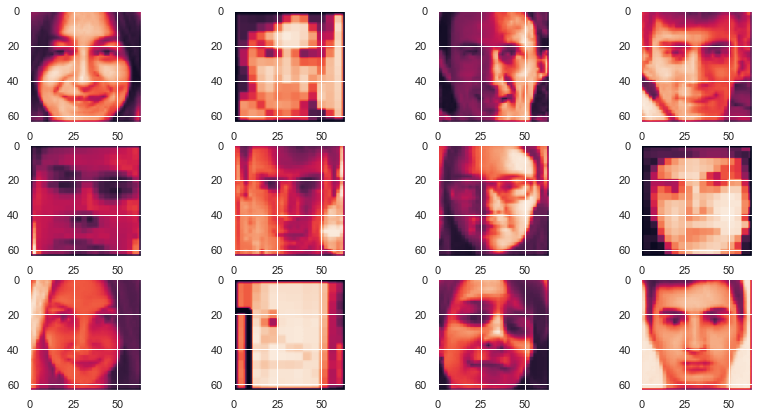

In [20]:
fig, axx = plt.subplots(3, 4, figsize=(14, 7))
axx = axx.ravel()
for i in range(12):
    img = x[12+i]
    axx[i].imshow(img)

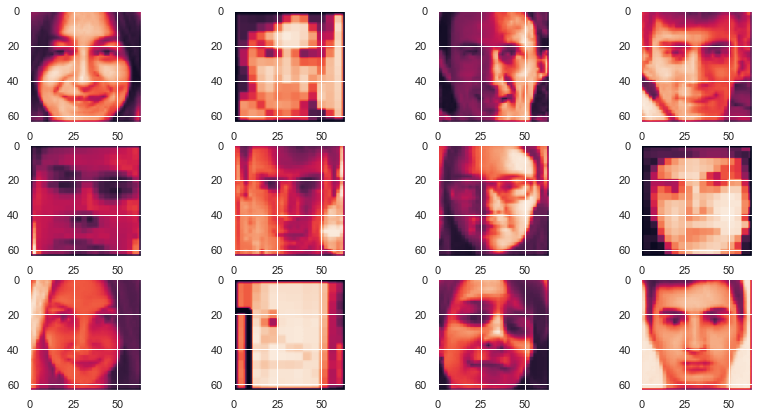

In [21]:
fig, axx = plt.subplots(3, 4, figsize=(14, 7))
axx = axx.ravel()
for i in range(12):
    img = Xtrain[i+12]
    axx[i].imshow(img)

## Аугментация

In [92]:
Xtrain = x
ytrain = y

In [93]:
import random
import albumentations as A

In [94]:
def get_aug(image):
    transform = A.Compose([
    A.HorizontalFlip(p = 0.5),
    #A.CLAHE(p = 0.3),
    A.ShiftScaleRotate(shift_limit=0.16, scale_limit=0.15, rotate_limit=12, p=.5),
    A.GaussNoise(mean = 20, var_limit = (60, 120), p = 0.3),
    ])
    return transform(image=image)['image']

In [95]:
X_aug = []
y_aug = []
for (a,b) in zip(Xtrain,ytrain):
    for i in range(4):
        X_aug.append(get_aug(a))
        y_aug.append(b)

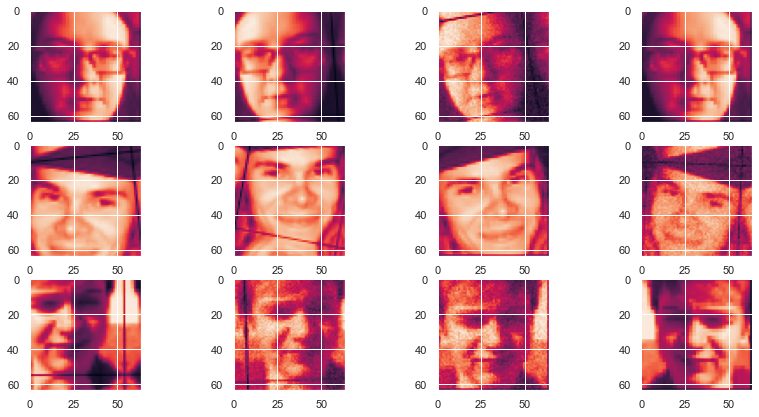

In [96]:
fig, axx = plt.subplots(3, 4, figsize=(14, 7))
axx = axx.ravel()
for i in range(12):
    img = X_aug[i]
    axx[i].imshow(img)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
a = np.asarray([el.ravel() for el in X_aug])
X_aug = a

In [99]:
X_t, X_val, y_t, y_val = train_test_split(X_aug, y_aug, stratify = y_aug, random_state=42)

## ЛогРег

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Перебор гиперпараметров для логрега

In [71]:
param_grid = {'C': [0.001, 0.05, 0.01, 0.1], 
             }
model_lr = LogisticRegression()
search = GridSearchCV(model_lr, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(X_aug, y_aug)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 0.001}


/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.decomposition import PCA, KernelPCA

In [100]:
X_aug = np.asarray([el.ravel() for el in X_aug])
X_val = np.asarray([el.ravel() for el in X_val])

In [44]:
#model_lr = LogisticRegression(C=0.7)
#pca = KernelPCA(n_components=1200, kernel='poly', random_state=42)
model_lr = make_pipeline(
   StandardScaler(),
    #pca,
    LogisticRegression(C=0.1)
)
model_lr.fit(X_aug, y_aug)


/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=0.1))])

In [45]:
pred_lr = model_lr.predict(X_val)
accuracy_score(y_val, pred_lr)

0.9620253164556962

In [47]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
set(y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [51]:
print(classification_report(y_val, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       0.92      1.00      0.96        12
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         8
           5       0.89      1.00      0.94         8
           6       1.00      0.86      0.92         7
           7       1.00      0.88      0.93         8
           8       0.89      1.00      0.94         8
           9       1.00      0.80      0.89         5

    accuracy                           0.96        79
   macro avg       0.97      0.95      0.96        79
weighted avg       0.97      0.96      0.96        79



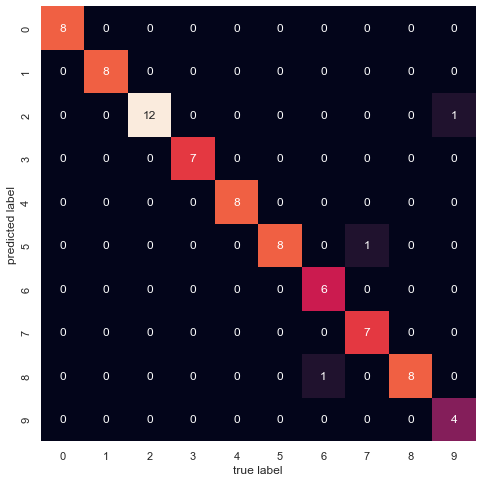

In [52]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8,8))
mat = confusion_matrix(y_val, pred_lr)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Предсказания логистической регрессии

In [72]:
import pandas as pd

In [73]:
#pca = KernelPCA(n_components=600, kernel='poly', random_state=42)
model_lr = make_pipeline(
    StandardScaler(),
    #pca,
    LogisticRegression(C=0.1)
)
model_lr.fit(X_aug, y_aug)
Xtest = np.asarray([el.ravel() for el in Xtest])
model_pred_aug = model_lr.predict(Xtest)

/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
pred_df = pd.DataFrame(list(zip(Names, model_pred_aug)), columns = ['img_name', 'pred_class'])
pred_df.head(10)

,img_name,pred_class
0,image0.png,6
1,image1.png,3
2,image2.png,4
3,image3.png,4
4,image4.png,0
5,image5.png,2
6,image6.png,3
7,image7.png,5
8,image8.png,7
9,image9.png,8


In [76]:
pred_df.to_csv("third_submission.csv", index=False)

/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ilatretak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

## Используем бустинг

In [77]:
X_t, X_val, y_t, y_val = train_test_split(Xtrain, ytrain, stratify = ytrain, random_state=42)

In [78]:
X_aug = []
y_aug = []
for (a,b) in zip(X_t,y_t):
    for i in range(4):
        X_aug.append(get_aug(a))
        y_aug.append(b)
X_val = np.asarray([el.ravel() for el in X_val])
X_t = np.asarray([el.ravel() for el in X_t])

In [79]:
from catboost import CatBoostClassifier
import catboost

ModuleNotFoundError: No module named 'catboost'

In [80]:
model_boost = CatBoostClassifier(random_state=42, eval_metric = "Accuracy", iterations = 30)

NameError: name 'CatBoostClassifier' is not defined

In [81]:
res = model_boost.fit(X_aug, y_aug)


NameError: name 'model_boost' is not defined

In [842]:
X_val = np.asarray([el.ravel() for el in X_val])
y_pred = res.predict(X_val)
accuracy_score(y_val, y_pred)

0.569620253164557

### Метод опорных векторов

In [108]:
from sklearn.svm import SVC
model_svm = SVC(kernel = 'rbf')
X_aug = np.asarray([el.ravel() for el in X_aug])
model_svm.fit(X_aug,y_aug)

SVC()

In [111]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
model_svm = SVC()
search = GridSearchCV(model_svm, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(X_aug, y_aug)

# выведем наилучшие параметры
print(search.best_params_)

{'kernel': 'rbf'}


In [112]:
pca = KernelPCA(n_components=600, kernel='poly', random_state=42)
model_svm = make_pipeline(
    StandardScaler(),
    pca,
    SVC(kernel = 'rbf')
)
model_svm.fit(X_aug, y_aug)
Xtest = np.asarray([el.ravel() for el in Xtest])
model_pred_aug = model_svm.predict(Xtest)

In [114]:
pred_df = pd.DataFrame(list(zip(Names, model_pred_aug)), columns = ['img_name', 'pred_class'])
pred_df.head(10)

,img_name,pred_class
0,image0.png,2
1,image1.png,3
2,image2.png,4
3,image3.png,6
4,image4.png,0
5,image5.png,2
6,image6.png,3
7,image7.png,5
8,image8.png,7
9,image9.png,8


In [116]:
pred_df.to_csv("fifth_submission.csv", index=False)